# Seaborn

## Initialization

- `seaborne` is a Python library for creating attractive statistical graphics.
- It is based on `matplotlib` and provides a high-level interface for creating plots.

In [14]:
"""
cd .\03seaborn\
jupyter nbconvert --to markdown sns.ipynb --output README.md
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
"""
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')


## Load Data To Construct Seaborn Plots


Importing in-built datasets from seaborn that are automatically downloaded at the time of installation. You can also use Pandas to import any dataset but using in-built datasets can come really handy when practising Seaborn. Here is how we can get a list of all datasets that are in-built in Seaborn

In [5]:
print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Seaborn For Statistical Analysis


Either of the following ways can be taken into consideration during the statistical analysis:

- `seaborn.scatterplot()`
- `seaborn.lineplot()`

### `seaborn.scatterplot()`


The seaborn.scatterplot() function is basically used to depict the relationship between the parameters on the given axes respectively. Every point on the graph depicts a value corresponding to it.

Syntax:`seaborn.scatterplot(x=col_name, y=col_name, data=data)`

In [30]:
df = pd.read_csv('user.csv')
df.head()

,name,age
0,Latifah,21
1,Garrison,22
2,Summer,24
3,Abdul,12
4,Denise,26


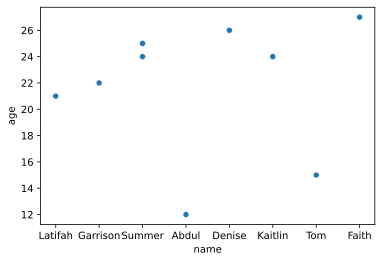

In [34]:
res = sns.scatterplot(x="name", y="age", data=df)
plt.show()

The column-`‘name’` is represented by the `x-axis` and the column-`‘age’` by the `y-axis`.



### `seaborn.lineplot()`


The seaborn.lineplot() function can be extensively used in situations wherein we feel the need to check the dependency of a parameter on the other in a continuous manner relative to time.

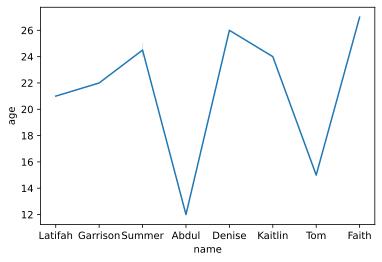

In [35]:
res = sns.lineplot(x="name", y="age", data=df)
plt.show()


### `relplot()`


This is a `figure-level-function` that makes use of two other axes functions for Visualizing Statistical Relationships which are:

- scatterplot()
- lineplot()

These functions can be specified using the ‘kind’ parameter of relplot(). In case this parameter is given, it takes the default one which is scatterplot(). Before you begin writing your code, make sure to import the required libraries as follows:

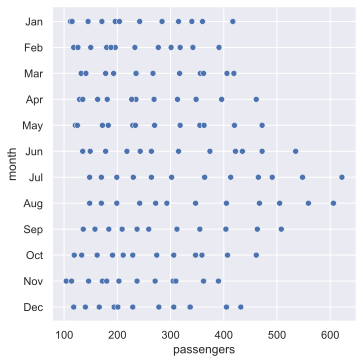

In [84]:
f = sns.load_dataset("flights")
sns.relplot(x="passengers", y="month", data=f)


As you can see, the points are plotted in 2-dimensions. 

However, you can add another dimension using the `‘hue’` semantic. Let’s take a look at an example of the same:



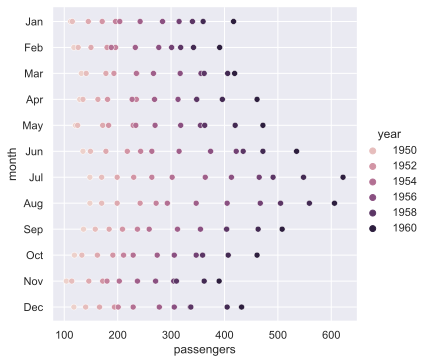

In [85]:
f = sns.load_dataset("flights")
sns.relplot(x="passengers", y="month", hue="year", data=f)

However, there are many more customizations that you can try out such as colors, styles, size, etc. Let me just show how you can change the color in the following example:



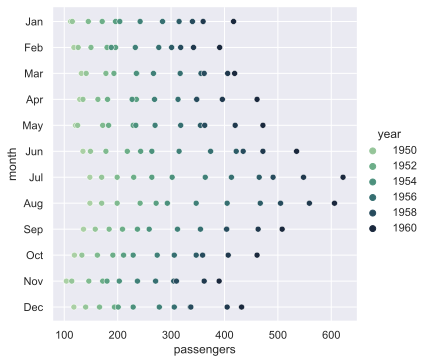

In [86]:
sns.set(style="darkgrid")
f = sns.load_dataset("flights")
sns.relplot(x="passengers", y="month", hue="year",
            palette="ch:r=-.5,l=.75", data=f)

This function will allow you to draw a continuous line for your data. You can use this function by changing the `‘kind’` parameter as follows:



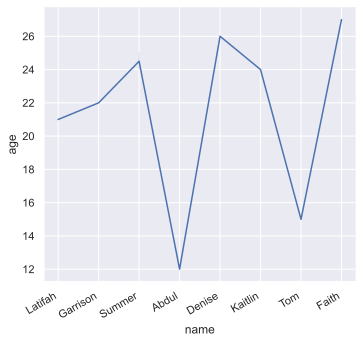

In [89]:
g = sns.relplot(x="name", y="age", kind="line", data=df)
g.fig.autofmt_xdate()


## Plotting with Categorical Data



### Categorical Estimate plots


The estimation of categorical data basically refers to the representation of certain estimation or prediction of the categorical data values to the corresponding data variable.

Python Seaborn has the following functions to be used for the estimation of categorical data:

- `countplot()`
- `barplot()`
- `pointplot()`

#### `countplot()`


##### Show value counts for a `single` categorical variable. 



A countplot basically **counts the categories** and **returns a count of their occurrences**. It is one of 

In [13]:
df = sns.load_dataset("tips")
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [14]:
df.groupby('sex').total_bill.count()

sex
Male      157
Female     87
Name: total_bill, dtype: int64

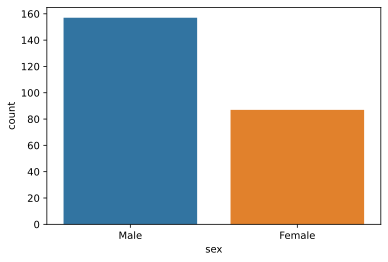

In [15]:
res = sns.countplot(x='sex',data=df)
plt.show()


Or

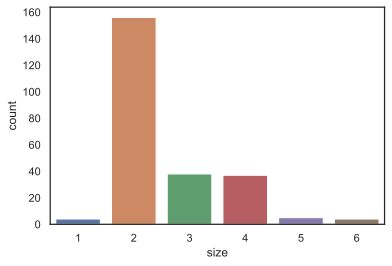

In [47]:
res = sns.countplot(x=df['size'])
plt.show()

In [30]:
# load dataset
titanic = sns.load_dataset('titanic')
titanic.head(2)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [31]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


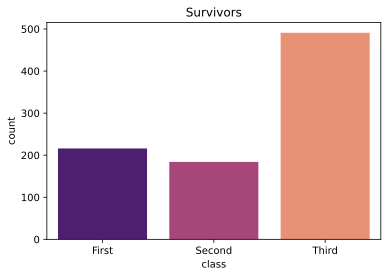

In [29]:
# create plot
sns.countplot(x='class', data=titanic, palette='magma')
plt.title('Survivors')
plt.show()


##### Showing value counts for `two` categorical variables 


Showing value counts for **two categorical variables** and using `hue` parameter:
- `hue` : (optional) This parameter take column name for colour encoding.

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable.

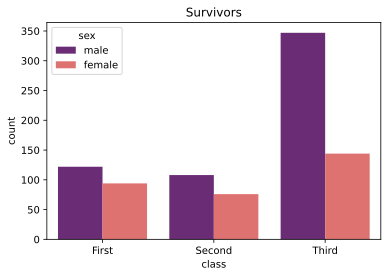

In [33]:
# create plot
sns.countplot(x='class', hue='sex', data=titanic, palette='magma')
plt.title('Survivors')
plt.show()


In [34]:
titanic.groupby(['class', 'sex']).count()

survived  pclass  age  sibsp  parch  fare  embarked  who  \
class  sex                                                                
First  female        94      94   85     94     94    94        92   94   
       male         122     122  101    122    122   122       122  122   
Second female        76      76   74     76     76    76        76   76   
       male         108     108   99    108    108   108       108  108   
Third  female       144     144  102    144    144   144       144  144   
       male         347     347  253    347    347   347       347  347   

               adult_male  deck  embark_town  alive  alone  
class  sex                                                  
First  female          94    81           92     94     94  
       male           122    94          122    122    122  
Second female          76    10           76     76     76  
       male           108     6          108    108    108  
Third  female         144     6          144    144    144  
       male           347     6          347    347    347

In [35]:
titanic.groupby(['class', 'who']).count()


survived  pclass  sex  age  sibsp  parch  fare  embarked  \
class  who                                                               
First  child         6       6    6    6      6      6     6         6   
       man         119     119  119   98    119    119   119       119   
       woman        91      91   91   82     91     91    91        89   
Second child        19      19   19   19     19     19    19        19   
       man          99      99   99   90     99     99    99        99   
       woman        66      66   66   64     66     66    66        66   
Third  child        58      58   58   58     58     58    58        58   
       man         319     319  319  225    319    319   319       319   
       woman       114     114  114   72    114    114   114       114   

              adult_male  deck  embark_town  alive  alone  
class  who                                                 
First  child           6     6            6      6      6  
       man           119    91          119    119    119  
       woman          91    78           89     91     91  
Second child          19     4           19     19     19  
       man            99     3           99     99     99  
       woman          66     9           66     66     66  
Third  child          58     3           58     58     58  
       man           319     5          319    319    319  
       woman         114     4          114    114    114

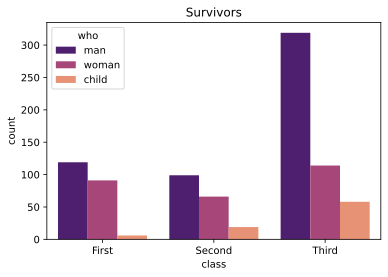

In [36]:
# create plot
sns.countplot(x='class', hue='who', data=titanic, palette='magma')
plt.title('Survivors')
plt.show()

#### `barplot()`


The `barplot()` function basically represents the estimated data in the form of the central tendency of the data representation.A `barplot` is basically used to **aggregate the categorical data according to some methods and by default its the `mean`**. It can also be understood as a visualization of the group by action. 

To use this plot we choose a `categorical` column for the `x-axis`  and a `numerical` column for the `y-axis`  and we see that it creates a plot taking a `mean` **per categorical column**. 




In [17]:
df = sns.load_dataset("tips")
df.groupby('sex').total_bill.mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

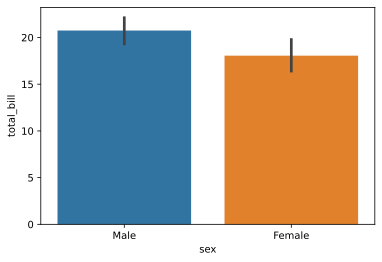

In [10]:
sns.barplot(x="sex", y="total_bill", data=df)
plt.show()

Horizontal orientation requires numeric `x` variable.

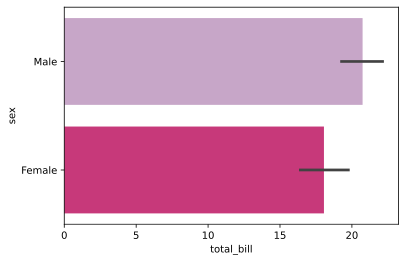

In [19]:
sns.barplot(y="sex", x="total_bill", data=df,
            palette='PuRd', orient='h',)
plt.show()


`mean` is default

In [11]:
df.groupby('sex').total_bill.std()

sex
Male      9.246469
Female    8.009209
Name: total_bill, dtype: float64

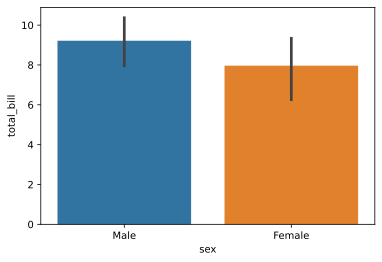

In [12]:
sns.barplot(x="sex", y="total_bill", data=df,estimator=np.std)
plt.show()

#### `pointplot()`


The seaborn.pointplot() function represents the estimation of the central tendency of the distribution with the help of scatter points and lines joining them.


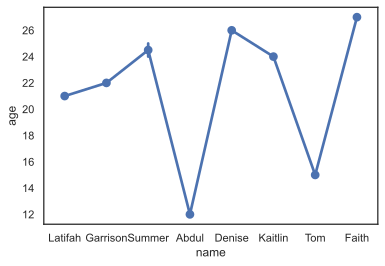

In [50]:
df = pd.read_csv("user.csv")
res = sns.pointplot(x=df['name'], y=df['age'])
plt.show()


### Categorical Scatter plot

Categorical data divides and represents itself in the form of **discrete groups** i.e. a subset of the original data.

Python Seaborn module contains the following methods to represent and visualize categorical data:

- `seaborn.stripplot()`
- `seaborn.swarmplot()`

#### `seaborn.stripplot()`


The seaborn.stripplot() function considers one of the input columns as categorical data input and then it plots the points accordingly in an ordinal fashion despite the different data type of the input.

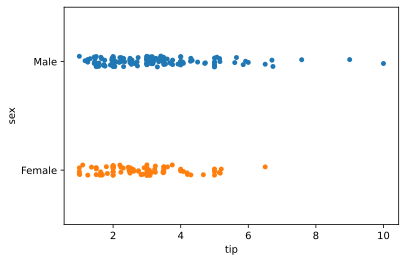

In [20]:
res = sns.stripplot(x="tip", y="sex", data=df, jitter=0.05)
plt.show()


The parameter jitter is useful when the data set consists of data points that **overlap**. In such cases, setting a `jitter` value can help them get uniformly distributed.

#### `saborn.swarmplot()`

The seaborn.swarmplot() function resembles the seaborn.stripplot() function with a slight difference. The seaborn.swarmplot() function plots the data values along the categorical axis chosen. Thus, it completely avoids overlapping.

C:\Users\soiko\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


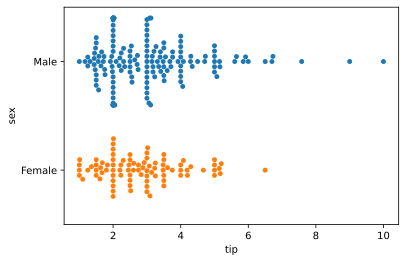

In [23]:
res = sns.swarmplot(x="tip", y="sex", data=df)
plt.show()

### Categorical Distribution Plots

Categorical Distribution data basically refers to the type of data wherein the result describes the certain possibility of the random/chosen variable to belong to one of the given possible categories.

Python Seaborn has the following functions to represent the categorical distributed data efficiently:

- `seaborn.violinplot()`
- `seaborn.boxplot()`
- `seaborn.boxenplot()`

#### `boxplot()`

The box plot, also called the box and whisker diagram is used for depicting groups of numerical data through the quartiles. It is known as the box and whisker diagram because it is composed of a box and whiskers. Boxplot is also used for detecting the outlier in a data set.

The `‘box’` structure represents the **main quartile of the data input**  while the `‘line’` structure represents the rest of the **distribution** of data. The outliers are represented by points using an **inter-quartile function**.

A box plot is composed of a summary of 5 different data points: the minimum, first quartile, median, third quartile, and maximum.

- Minimum
- First Quartile or 25%
- Median (Second Quartile) or 50%
- Third Quartile or 75%
- Maximum

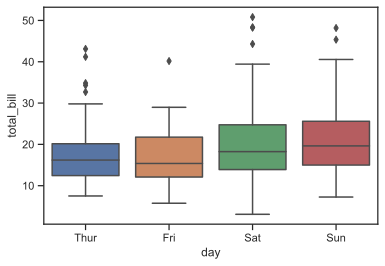

In [43]:
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

Let me briefly explain the above plot.

- The bottom black horizontal line of the box plot is the minimum value
- The first black horizontal line of the rectangle shape of the box plot is the first quartile
 or 25%
- The second black horizontal line of the rectangle shape of the box plot is Second quartile or 50% or median.
- The third black horizontal line of rectangle shape of the same box plot is third quartile or 75%
- The top black horizontal line of the rectangle shape of the box plot is the maximum value.
- The small diamond shape of the box plot is outlier data.

##### Using hue parameter:



While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable.



Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


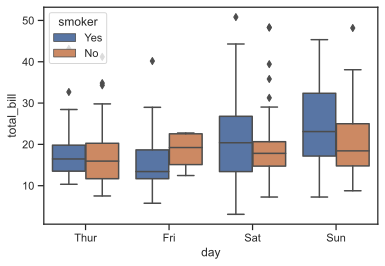

In [46]:
tips = sns.load_dataset("tips")
print(tips.columns)
sns.boxplot(x="day", y="total_bill", data=tips,hue='smoker')
plt.show()


[https://www.geeksforgeeks.org/python-seaborn-tutorial/](https://www.geeksforgeeks.org/python-seaborn-tutorial/)

[https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/](https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/)

#### `violinplot()`

Violin plots also like `boxplots` **summarize** numeric data over a set of categories. They are essentially a box plot with a **kernel density estimate** (`KDE`) overlaid along with the range of the box and reflected to make it look nice. Unlike a box plot, in which all of the plot components correspond to actual data points, the violin plot features a kernel density estimation of the underlying distribution. Here are a few examples of violin plot:



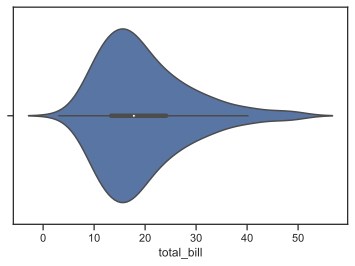

In [49]:

tips = sns.load_dataset("tips")
ax = sns.violinplot(x=tips["total_bill"])
plt.show()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

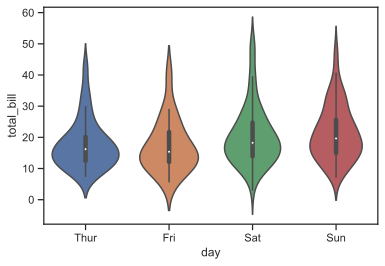

In [52]:
tips = sns.load_dataset("tips")
sns.violinplot(x="day", y="total_bill", data=tips)


#####  Using hue parameter:

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

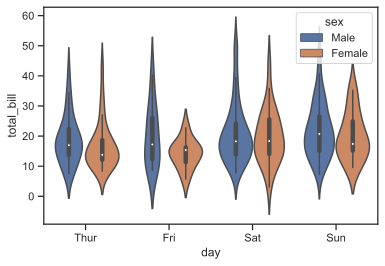

In [53]:
tips = sns.load_dataset("tips")
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

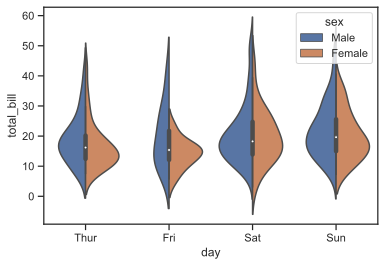

In [54]:
tips = sns.load_dataset("tips")
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,split=True)


[https://www.geeksforgeeks.org/python-seaborn-tutorial/](https://www.geeksforgeeks.org/python-seaborn-tutorial/)

[phttps://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/](https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/)

#### `boxenplot()`

The `seaborn.boxenplot()` function is quite similar to `seaborn.boxplot()` function with a slight difference in the representation.

The `seaborn.boxenplot()` function represents the distribution of the categorical data in a way where the **large quartiles** represent the features corresponding to the actual data observations. It presents the data in a format that gives us a **detailed information in a visualized form**about the entire distribution of data.

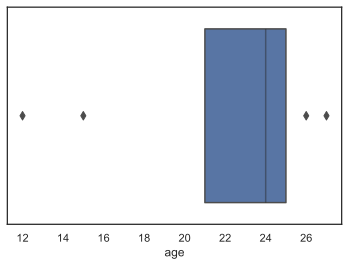

In [43]:
df = pd.read_csv("user.csv")
res = sns.boxenplot(x=df['age'])
plt.show()


<div align="center">
<img src="img/box.jpg" alt="box.jpg" width="500px">
</div>

If you analyze and compare the below output with the input data set, it is clearly understood that boxenplot represents the entire distribution of the data points ranging between 12-27, along with the distribution of the categorical data with a large quartile-box structure.



### `catplot()`

This approach comes into the picture when our main variable is further divided into discrete groups (categorical). This can be achieved using the `catplot()` function.

The `seaborn.catplot()` function, as mentioned above, is one of the techniques to analyze the **relationship between a `numeric` value and a `categorical` group of values together**.

This is a `figure-level-function` like `relplot()`. It can be characterized by three families of axes level functions namely:

- [Categorical Scatter Plot](#categorical-scatter-plot): These include` stripplot()`,` swarmplot()`
- [Categorical Distribution Plots](#categorical-distribution-plots): which are `boxplot()`, `violinplot()`, `boxenplot()`
- [Categorical Estimate Plots](#categorical-estimate-plots): namely `pointplot()`, `barplot()`,` countplot()`


In [3]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


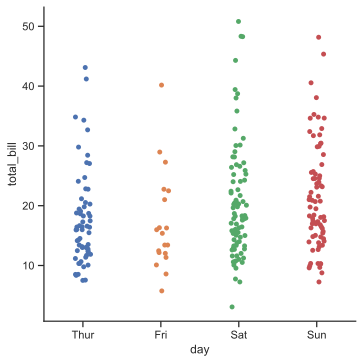

In [93]:
sns.set(style="ticks", color_codes=True)
a = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=a)


As you can see, in the above example I have not set the `‘kind’` parameter. Therefore it has returned the graph as the default scatterplot. You can specify any of the axes level function to change the graph as need be. Let’s take an example of this as well:


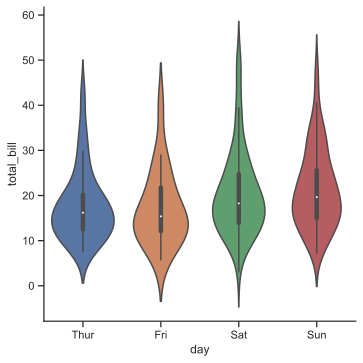

In [41]:
sns.set(style="ticks", color_codes=True)
a = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", kind="violin", data=a)

## Plotting univariate(single variable) Distributions

`Univariate distribution` basically refers to the distribution of the data with respect to a **single random `variable`/data item.**

### `distplot()`


Python Seaborn module’s `distplot()` function can be used to represent the univariate distribution of data set.

Syntax: `seaborn.distplot(data-column)`

In [65]:
df = sns.load_dataset("tips")
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


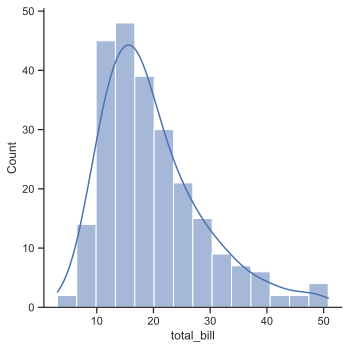

In [73]:
sns.displot(df['total_bill'],kde=True)
plt.show()

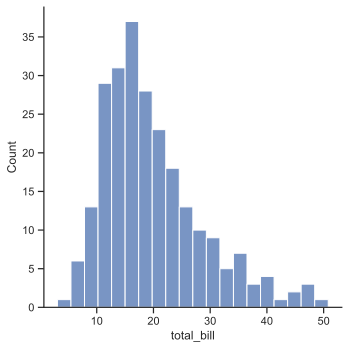

In [74]:
df = sns.load_dataset("tips")
sns.displot(df['total_bill'], kde=False,bins=20)
plt.show()

### `kdeplot()`

`KDE` plot is a Kernel Density Estimate that is used for visualizing the Probability Density of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether. Here are few of the examples



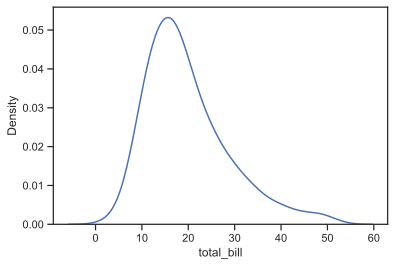

In [68]:
df = sns.load_dataset("tips")
sns.kdeplot(df['total_bill'])
plt.show()

### `histplot()`

`distplot` is a deprecated 

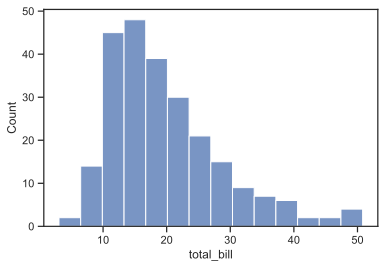

In [69]:
df = sns.load_dataset("tips")
sns.histplot(df['total_bill'])
plt.show()


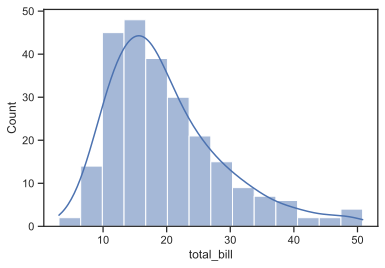

In [70]:
df = sns.load_dataset("tips")
sns.histplot(df['total_bill'],kde=True)
plt.show()


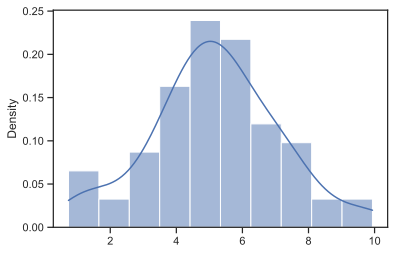

In [105]:
np.random.seed(10)
a = np.random.normal(loc=5, size=100, scale=2)
sns.histplot(a, kde=True, stat="density")
plt.show()

## Depicting bivariate distributions


**Bivariate distribution** refers to the visualization of data with respect to **two data columns or items of the data set.**

The `jointplot()` can be used to depict the relationship between the two data variables.

Syntax:`seaborn.jointplot(x=variable1, y=variable2)`

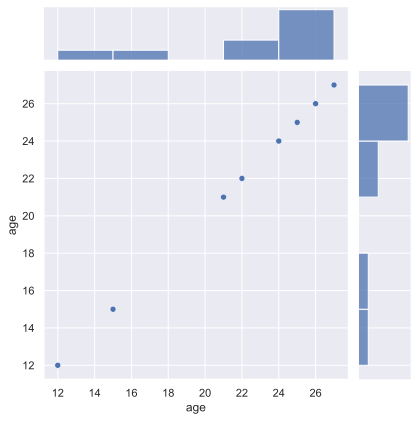

In [83]:
sns.set_style("darkgrid")
df = pd.read_csv("user.csv")
res = sns.jointplot(x=df['age'], y=df['age'])
plt.show()


In [79]:
df = sns.load_dataset("tips")
df.head(2)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


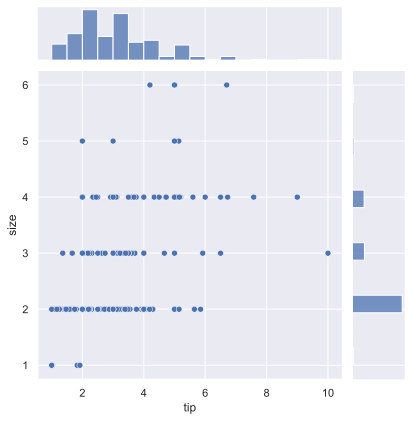

In [80]:
sns.set_style("darkgrid")
# df = pd.read_csv("user.csv")
res = sns.jointplot(x=df['tip'], y=df['size'])
plt.show()


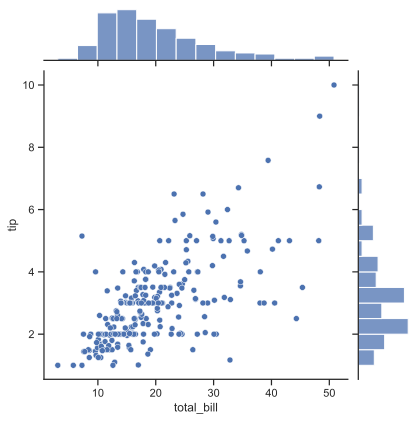

In [75]:
df = sns.load_dataset("tips")
res = sns.jointplot(x="total_bill", y="tip", data=df)
plt.show()

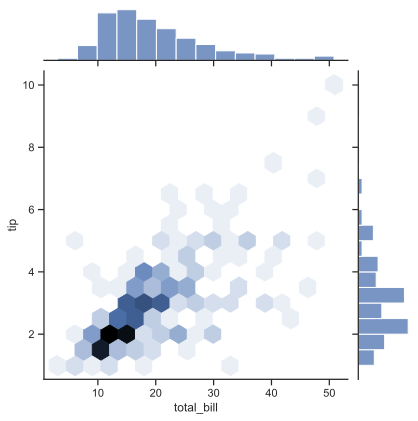

In [76]:
df = sns.load_dataset("tips")
res = sns.jointplot(x="total_bill", y="tip", data=df, kind="hex")
plt.show()

## Multi-Plot grids


In order to represent the large data set with categorical values in a precise manner, we can draw multiple plots of the sub-sets of data to visualize it.

### Facetgrid



Facet grid forms a matrix of panels defined by row and column by dividing the variables. Due to panels, a single plot looks like multiple plots. It is very helpful to analyze all combinations in two discrete variables.

The advantage of using Facet is, we can input another variable into the plot. The above plot is divided into two plots based on a third variable called ‘diet’ using the ‘col’ parameter. We can also one more parameter “row” which can help to add one more variable to our plot. Now the plot below shows that relation between tips and total bill and also show their relation with two more variables,i.e gender and time.

Syntax: `seaborn.FacetGird(data, col=value, col_wrap=value)`

- FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.
- A FacetGrid can be drawn with up to three dimensions ? row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.
- FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid. The variables should be categorical and the data at each level of the variable will be used for a facet along that axis.

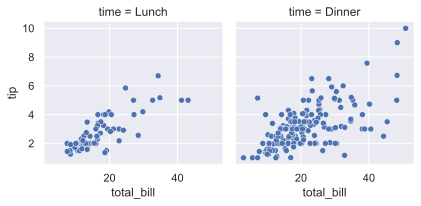

In [85]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()

### 🚀🚀Pair Grid + Pair Plot


`Pairplot` represents pairwise relation across the entire dataframe and supports an additional argument called `hue` for categorical separation. What it does basically is create a `jointplot` between every possible numerical column and takes a while if the dataframe is really huge. It is plotted using the `pairplot()` method.

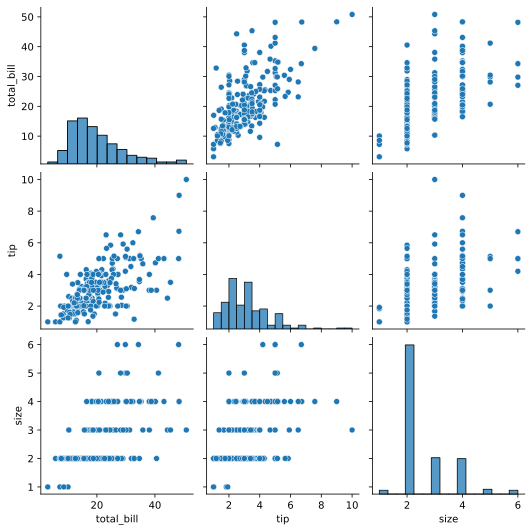

In [3]:
tips = sns.load_dataset("tips")
sns.pairplot(tips)
plt.show()

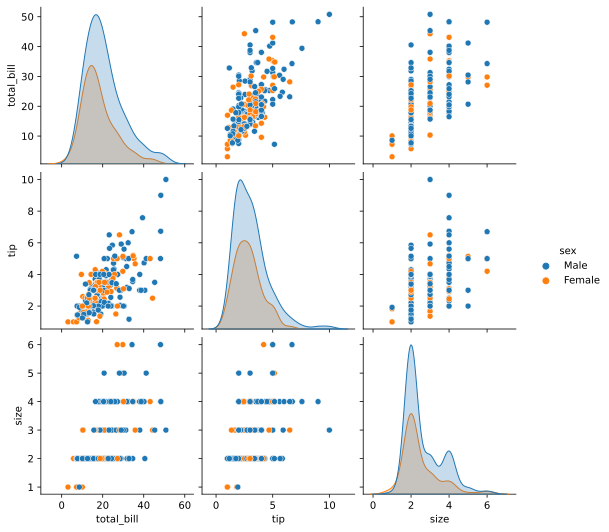

In [4]:
tips = sns.load_dataset("tips")
sns.pairplot(tips,hue='sex')
plt.show()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


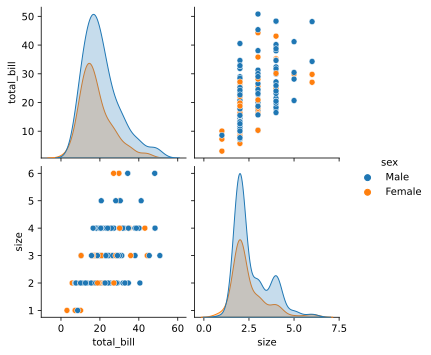

In [9]:
tips = sns.load_dataset("tips")
cols = ['total_bill', 'size']
sns.pairplot(tips,hue='sex', vars=cols)
plt.show()


Using PairGrid:

- [https://seaborn.pydata.org/generated/seaborn.PairGrid.html](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

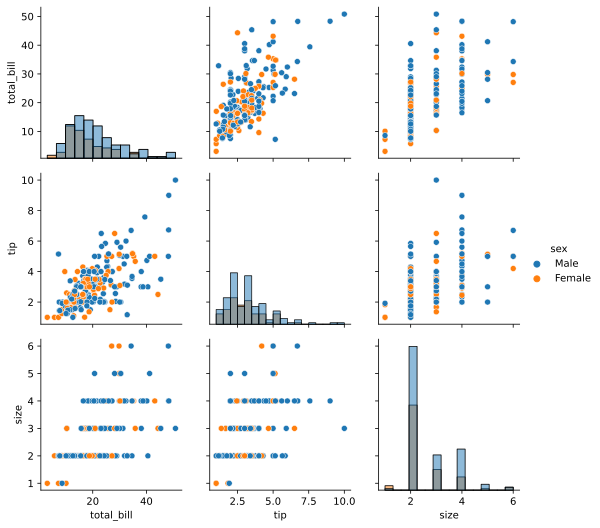

In [21]:
# cols = ['total_bill', 'size']
# g = sns.PairGrid(tips,hue='sex', vars=cols)

g = sns.PairGrid(tips,hue='sex')
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()


## Heatmap and Correlation

### Correlation

In [88]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


Pandas `corr()` is used to find the pairwise correlation of all columns in the dataframe. Correlation is the measure of the linear relationship between the two variables.

The output of the methods is between `1` and `-1`.

- `1` indicates a strong positive relationship.
- `-1` indicates a strong negative relationship.
- `A result of zero indicates no relationship at all.

In [92]:
tips_corr = tips.corr()
tips_corr


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Heatmap

Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or **higher activities brighter colors** basically reddish colors are used and to represent **less common or activity values, darker colors** are preferred. it can be plotted using the `heatmap()` function.

In [93]:
tips = sns.load_dataset("tips")
tips_corr = tips.corr()
tips_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

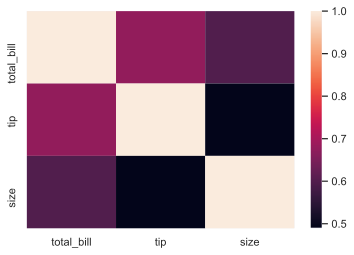

In [91]:
sns.heatmap(tips_corr)

<AxesSubplot:>

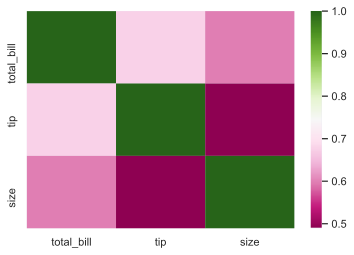

In [110]:
sns.heatmap(tips_corr, cmap="PiYG")


[Control color in seaborn heatmaps](https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps)

<AxesSubplot:>

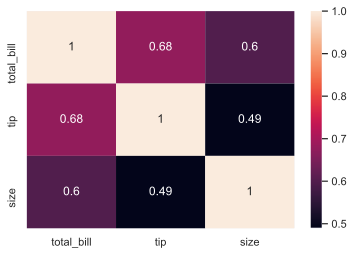

In [96]:
sns.heatmap(tips_corr,annot=True)

### `pd.pivot_table()`

In [97]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [99]:
flights_pivot = flights.pivot_table(index="month", columns="year", values="passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

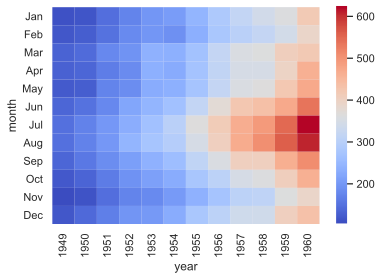

In [107]:
sns.heatmap(flights_pivot, cmap="coolwarm")


### `clustermap()`

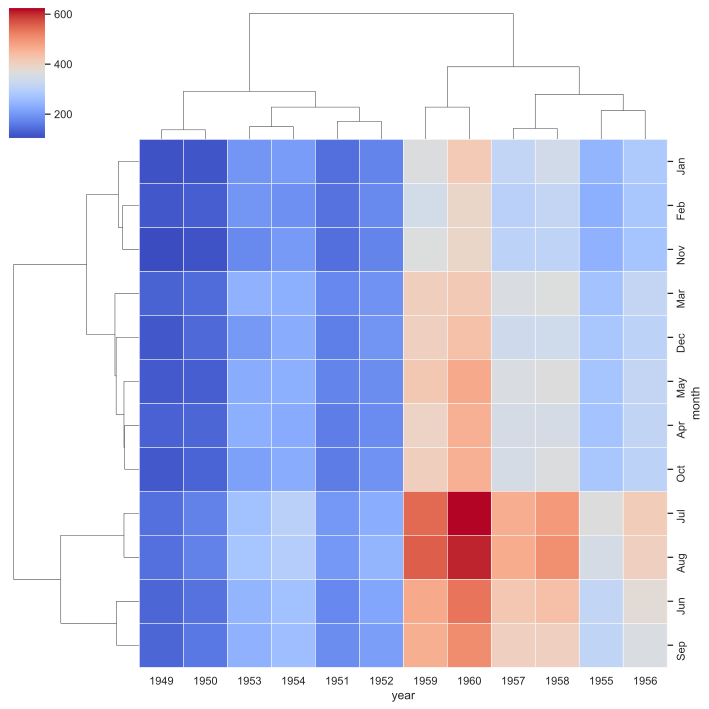

In [109]:
sns.clustermap(flights_pivot, linewidths=.5, cmap="coolwarm")

## Customized Styles and Themes in Seaborn


Python Seaborn provides us with the following themes to work with and represent, visualize the data:

- Ticks
- Whitegrid theme
- Darkgrid theme
- Dark
- White

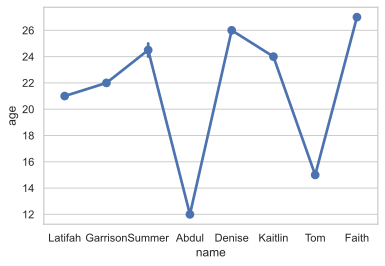

In [52]:
sns.set_style("whitegrid")
csv = pd.read_csv("user.csv")
res = sns.pointplot(x=csv['name'], y=csv['age'])
plt.show()
